## Import libraries

In [396]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import Dataset

In [397]:
bitcoin = pd.read_csv('datasets/bitcoin_train.csv')

In [398]:
bitcoin.head()

,Unnamed: 0,address,year,day,length,weight,count,looped,neighbors,income,label
0,0,1BpvJgUs7UprQu9z8fLsP7pFvFcCscHRCV,2011,287,2,0.250000,1,0,2,3.009500e+08,white
1,1,1EnSeTPjMxZm9X9iQDYmMUDoLQQ3ouDN6F,2015,77,0,1.000000,1,0,1,4.820000e+07,white
2,2,1mwkhYHeoqGBkVW84yFpYCSqRDt5TWSBQ,2011,164,52,0.000977,23,0,2,2.349582e+10,white
3,3,19XUCsxgpHZGXKLgVMpdoyZqcFdeM3pGeE,2014,86,144,0.000001,1555,1152,2,9.581274e+07,white
4,4,14Ef6MGSYLEbigo55CpPBGEGSGYwwB7xhY,2015,261,6,0.250000,1,0,2,3.424024e+07,white


In [399]:
bitcoin.shape

(2333357, 11)

In [400]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333357 entries, 0 to 2333356
Data columns (total 11 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   address     object 
 2   year        int64  
 3   day         int64  
 4   length      int64  
 5   weight      float64
 6   count       int64  
 7   looped      int64  
 8   neighbors   int64  
 9   income      float64
 10  label       object 
dtypes: float64(2), int64(7), object(2)
memory usage: 195.8+ MB


In [401]:
bitcoin.describe()

,Unnamed: 0,year,day,length,weight,count,looped,neighbors,income
count,2.333357e+06,2.333357e+06,2.333357e+06,2.333357e+06,2.333357e+06,2.333357e+06,2.333357e+06,2.333357e+06,2.333357e+06
mean,1.166678e+06,2.014476e+03,1.814778e+02,4.504554e+01,5.456381e-01,7.223780e+02,2.387287e+02,2.213161e+00,4.383004e+09
std,6.735823e+05,2.257312e+00,1.039893e+02,5.900348e+01,3.652788e+00,1.689861e+03,9.670131e+02,1.888230e+01,1.520211e+11
min,0.000000e+00,2.011000e+03,1.000000e+00,0.000000e+00,1.420108e-90,1.000000e+00,0.000000e+00,1.000000e+00,3.000000e+07
25%,5.833390e+05,2.013000e+03,9.200000e+01,2.000000e+00,2.152083e-02,1.000000e+00,0.000000e+00,1.000000e+00,7.434000e+07
50%,1.166678e+06,2.014000e+03,1.810000e+02,8.000000e+00,2.500000e-01,1.000000e+00,0.000000e+00,2.000000e+00,2.000000e+08
75%,1.750017e+06,2.016000e+03,2.710000e+02,1.080000e+02,8.794643e-01,5.700000e+01,0.000000e+00,2.000000e+00,9.940669e+08
max,2.333356e+06,2.018000e+03,3.650000e+02,1.440000e+02,1.943749e+03,1.449700e+04,1.449600e+04,1.292000e+04,4.982447e+13


In [403]:
bitcoin = bitcoin.drop(['Unnamed: 0','address','day','year'],axis=1)
bitcoin.head()

,length,weight,count,looped,neighbors,income,label
0,2,0.250000,1,0,2,3.009500e+08,white
1,0,1.000000,1,0,1,4.820000e+07,white
2,52,0.000977,23,0,2,2.349582e+10,white
3,144,0.000001,1555,1152,2,9.581274e+07,white
4,6,0.250000,1,0,2,3.424024e+07,white


In [405]:
bitcoin

,length,weight,count,looped,neighbors,income,label
0,2,0.250000,1,0,2,3.009500e+08,white
1,0,1.000000,1,0,1,4.820000e+07,white
2,52,0.000977,23,0,2,2.349582e+10,white
3,144,0.000001,1555,1152,2,9.581274e+07,white
4,6,0.250000,1,0,2,3.424024e+07,white
...,...,...,...,...,...,...,...
2333352,10,0.062500,1,0,1,5.140488e+07,white
2333353,144,0.003251,6066,0,2,1.000000e+08,white
2333354,20,0.002604,2,0,2,3.324864e+09,white
2333355,0,1.000000,1,0,2,1.045210e+09,white


In [406]:
to_other = ["CryptoTorLocker2015","SamSam","GlobeImposter","Globev3","WannaCry","Globe","Razy","KeRanger","APT","Flyper",
"CryptConsole","XTPLocker","VenusLocker","JigSaw","XLockerv5.0","EDA2","Jigsaw","Sam","ComradeCircle","XLocker"]
bitcoin = bitcoin.replace(to_other,"others")
bitcoin

,length,weight,count,looped,neighbors,income,label
0,2,0.250000,1,0,2,3.009500e+08,white
1,0,1.000000,1,0,1,4.820000e+07,white
2,52,0.000977,23,0,2,2.349582e+10,white
3,144,0.000001,1555,1152,2,9.581274e+07,white
4,6,0.250000,1,0,2,3.424024e+07,white
...,...,...,...,...,...,...,...
2333352,10,0.062500,1,0,1,5.140488e+07,white
2333353,144,0.003251,6066,0,2,1.000000e+08,white
2333354,20,0.002604,2,0,2,3.324864e+09,white
2333355,0,1.000000,1,0,2,1.045210e+09,white


In [408]:
# top three ransom labels that have the most ransom transactions: Locky, Cerber, CryptoWall

In [409]:
num_white = bitcoin.loc[(bitcoin['label'] == 'white')].shape[0]
num_ransom = bitcoin.shape[0] - num_white
basic = pd.DataFrame({'category':['white', 'ransom'], 'count':[num_white, num_ransom]})
basic['percent'] = basic['count'] / bitcoin.shape[0]
basic

,category,count,percent
0,white,2300268,0.985819
1,ransom,33089,0.014181


In [410]:
white_bt = bitcoin.loc[bitcoin['label'] == 'white']
non_white_bt = bitcoin.loc[~(bitcoin['label'] == 'white')]

In [411]:
from sklearn.preprocessing import StandardScaler

In [412]:
scaler = StandardScaler()
scaler.fit(bitcoin.drop('label',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [413]:
scaled_data = scaler.transform(bitcoin.drop('label',axis=1))

In [414]:
from sklearn.decomposition import PCA

In [415]:
pca = PCA(n_components=2)

In [416]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [417]:
x_pca = pca.transform(scaled_data)

In [418]:
scaled_data.shape

(2333357, 6)

In [419]:
x_pca.shape

(2333357, 2)

In [420]:
x_pca[:,0]

array([-0.81476972, -0.81405158, -0.33129286, ..., -0.65001648,
       -0.80633249, -0.20877476])

In [421]:
x_pca[:,1]

array([ 0.10366484,  0.20971785, -0.02437564, ...,  0.02164406,
        0.2471492 , -0.08366317])

In [422]:
bitcoin['label'].values

array(['white', 'white', 'white', ..., 'white', 'white', 'white'],
      dtype=object)

In [423]:
bitcoin

,length,weight,count,looped,neighbors,income,label
0,2,0.250000,1,0,2,3.009500e+08,white
1,0,1.000000,1,0,1,4.820000e+07,white
2,52,0.000977,23,0,2,2.349582e+10,white
3,144,0.000001,1555,1152,2,9.581274e+07,white
4,6,0.250000,1,0,2,3.424024e+07,white
...,...,...,...,...,...,...,...
2333352,10,0.062500,1,0,1,5.140488e+07,white
2333353,144,0.003251,6066,0,2,1.000000e+08,white
2333354,20,0.002604,2,0,2,3.324864e+09,white
2333355,0,1.000000,1,0,2,1.045210e+09,white


In [425]:
def replace_others(string):
    if string == 'white':
        return 1
    else:
        return 0

In [426]:
bitcoin['label'] = bitcoin['label'].apply(replace_others)
bitcoin['label'].value_counts()

1    2300268
0      33089
Name: label, dtype: int64

Text(0, 0.5, 'Second Principal Component')

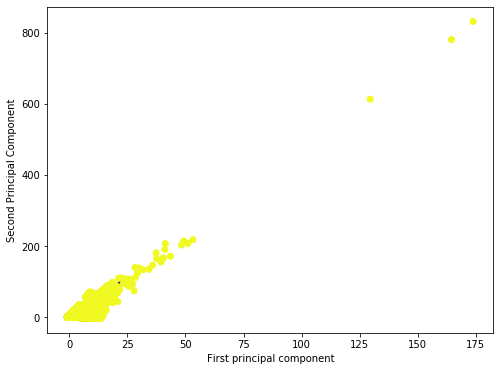

In [427]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c= bitcoin['label'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [428]:
pca.components_

array([[ 0.56672201,  0.1339597 ,  0.6096856 ,  0.51779605,  0.14216085,
         0.02901683],
       [-0.1333643 ,  0.67172664, -0.13366912, -0.06917191,  0.68040533,
         0.21305794]])

In [429]:
bitcoin.columns[:-1]

Index(['length', 'weight', 'count', 'looped', 'neighbors', 'income'], dtype='object')

In [430]:
bitcoin_comp = pd.DataFrame(pca.components_,columns=bitcoin.columns[:-1])

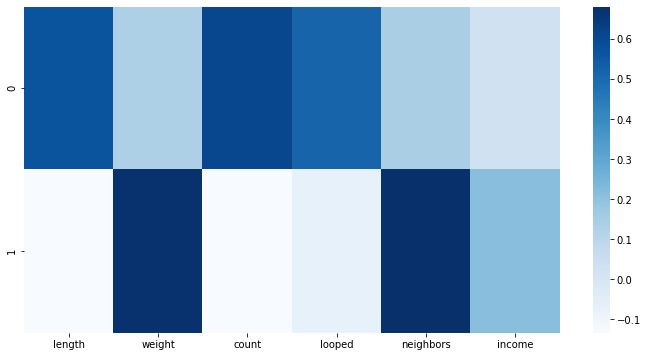

In [431]:
plt.figure(figsize=(12,6))
sns.heatmap(bitcoin_comp,cmap='Blues',)

In [432]:
bitcoin['PC_1'] = x_pca[:,0]
bitcoin['PC_2'] = x_pca[:,1]

In [348]:
bitcoin

,length,weight,count,looped,neighbors,income,label,PC_1,PC_2
0,2,0.250000,1,0,2,3.009500e+08,1,-0.814770,0.103665
1,0,1.000000,1,0,1,4.820000e+07,1,-0.814052,0.209718
2,52,0.000977,23,0,2,2.349582e+10,1,-0.331293,-0.024376
3,144,0.000001,1555,1152,2,9.581274e+07,1,1.717435,-0.468882
4,6,0.250000,1,0,2,3.424024e+07,1,-0.776401,0.094250
...,...,...,...,...,...,...,...,...,...
2333352,10,0.062500,1,0,1,5.140488e+07,1,-0.752383,0.014719
2333353,144,0.003251,6066,0,2,1.000000e+08,1,2.728232,-0.742698
2333354,20,0.002604,2,0,2,3.324864e+09,1,-0.650016,0.021644
2333355,0,1.000000,1,0,2,1.045210e+09,1,-0.806332,0.247149


In [349]:
from sklearn.model_selection import train_test_split

In [360]:
bitcoin.columns

Index(['length', 'weight', 'count', 'looped', 'neighbors', 'income', 'label',
       'PC_1', 'PC_2'],
      dtype='object')

In [361]:
X_train, X_test, y_train, y_test = train_test_split(bitcoin[['length', 'weight', 'count', 'looped', 'neighbors', 'income']], 
                                                    bitcoin['label'], test_size=0.30, 
                                                    random_state=101)

In [362]:
from sklearn.linear_model import LogisticRegression

In [363]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [364]:
predictions = logmodel.predict(X_test)

In [365]:
from sklearn.metrics import classification_report

In [366]:
print(classification_report(y_test,predictions))

/Users/yunyihuang/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      9977
           1       0.99      1.00      0.99    690031

    accuracy                           0.99    700008
   macro avg       0.49      0.50      0.50    700008
weighted avg       0.97      0.99      0.98    700008

